In [21]:
import os
import sys

repository_path = r"/home/emmanuel/EQviewer"  ##change this path where is located the main directory
rep_data = os.path.join("..","data")
rep_out = os.path.join("..","outs")
sys.path.insert(0,repository_path)

# Focal Mechanism
In this notebook, you will see some examples to manipulate the FM object. You also will learn how to use it to plot it in your map.

In [22]:
import pandas as pd
from EQViewer.eqviewer import FM,BaseMeca,CPT

fm object receives a dataframe as input. We are going to load focal mechanisms saved in [fm.csv](https://github.com/ecastillot/EQViewer/blob/master/data/mf/fm.csv) taken from [ISC: Focal Mechanism solutions](http://www.isc.ac.uk/cgi-bin/web-db-run?request=COMPREHENSIVE&out_format=FMCSV&searchshape=RECT&bot_lat=38.749&top_lat=38.88&left_lon=-122.9&right_lon=-122.76&ctr_lat=&ctr_lon=&radius=&max_dist_units=deg&srn=&grn=&start_year=2016&start_month=12&start_day=31&start_time=00%3A00%3A00&end_year=2021&end_month=1&end_day=01&end_time=00%3A00%3A00&min_dep=&max_dep=&min_mag=&max_mag=&req_mag_type=&req_mag_agcy=&req_fm_agcy=Any&include_links=on).

In [23]:
fmpath = os.path.join(rep_data,"fm","fm.csv")
df = pd.read_csv(fmpath)
df

,latitude,longitude,depth,strike,dip,rake,magnitude
0,38.8220,-122.8410,5.0,244.00,75.00,-7.00,4.0
1,38.8200,-122.8600,12.0,247.00,65.00,-12.00,5.1
2,38.8200,-122.8400,11.5,158.00,84.00,166.00,5.1
3,38.7877,-122.7780,3.5,164.99,77.18,172.75,4.8
4,38.7963,-122.7787,1.5,52.07,65.00,-46.29,4.6
5,38.8267,-122.8113,3.5,28.96,47.84,-91.79,3.9
6,38.8475,-122.7398,5.0,18.77,38.76,-130.88,4.6
7,38.8352,-122.7982,8.0,51.70,55.17,-67.63,5.2
8,38.7395,-122.7742,5.0,230.95,52.95,-29.00,5.1
9,38.8338,-122.8067,3.5,51.60,53.79,-48.68,5.0


You can define how do you want to plot the FM object in your map. Take in mind the next tips:

 - BaseMeca helps us with this task, it receives some parameters of [pygmt.meca](https://www.pygmt.org/latest/api/generated/pygmt.Figure.meca.html)

When we print the FM object, it shows us the number of mechanisms.

In [24]:
basemeca = BaseMeca(scale="1.0c",color="red",cmap=False,
                transparency=None)
fm = FM(data=df,basemeca=basemeca)
print(fm)

Catalog | 11 focal mechanisms 


Or you can print more detail information.

In [25]:
print(fm.__str__(True))

Catalog | 11 focal mechanisms 
	depth : [1.5, 12.0]
	magnitude : [3.9, 5.2]
	region: [-122.86, -122.74, 38.74, 38.85]


There are some util functions. For instance, sort values by features specified in the dataframe.

In [26]:
fm.sort_values(by="magnitude",ignore_index=True)
print(fm.data)

    latitude  longitude  depth  strike    dip    rake  magnitude
0    38.8267  -122.8113    3.5   28.96  47.84  -91.79        3.9
1    38.8220  -122.8410    5.0  244.00  75.00   -7.00        4.0
2    38.7963  -122.7787    1.5   52.07  65.00  -46.29        4.6
3    38.8475  -122.7398    5.0   18.77  38.76 -130.88        4.6
4    38.7877  -122.7780    3.5  164.99  77.18  172.75        4.8
5    38.8393  -122.8227    3.5   20.88  48.60 -102.51        4.8
6    38.8338  -122.8067    3.5   51.60  53.79  -48.68        5.0
7    38.8200  -122.8600   12.0  247.00  65.00  -12.00        5.1
8    38.8200  -122.8400   11.5  158.00  84.00  166.00        5.1
9    38.7395  -122.7742    5.0  230.95  52.95  -29.00        5.1
10   38.8352  -122.7982    8.0   51.70  55.17  -67.63        5.2


Plot your FM object in a map.

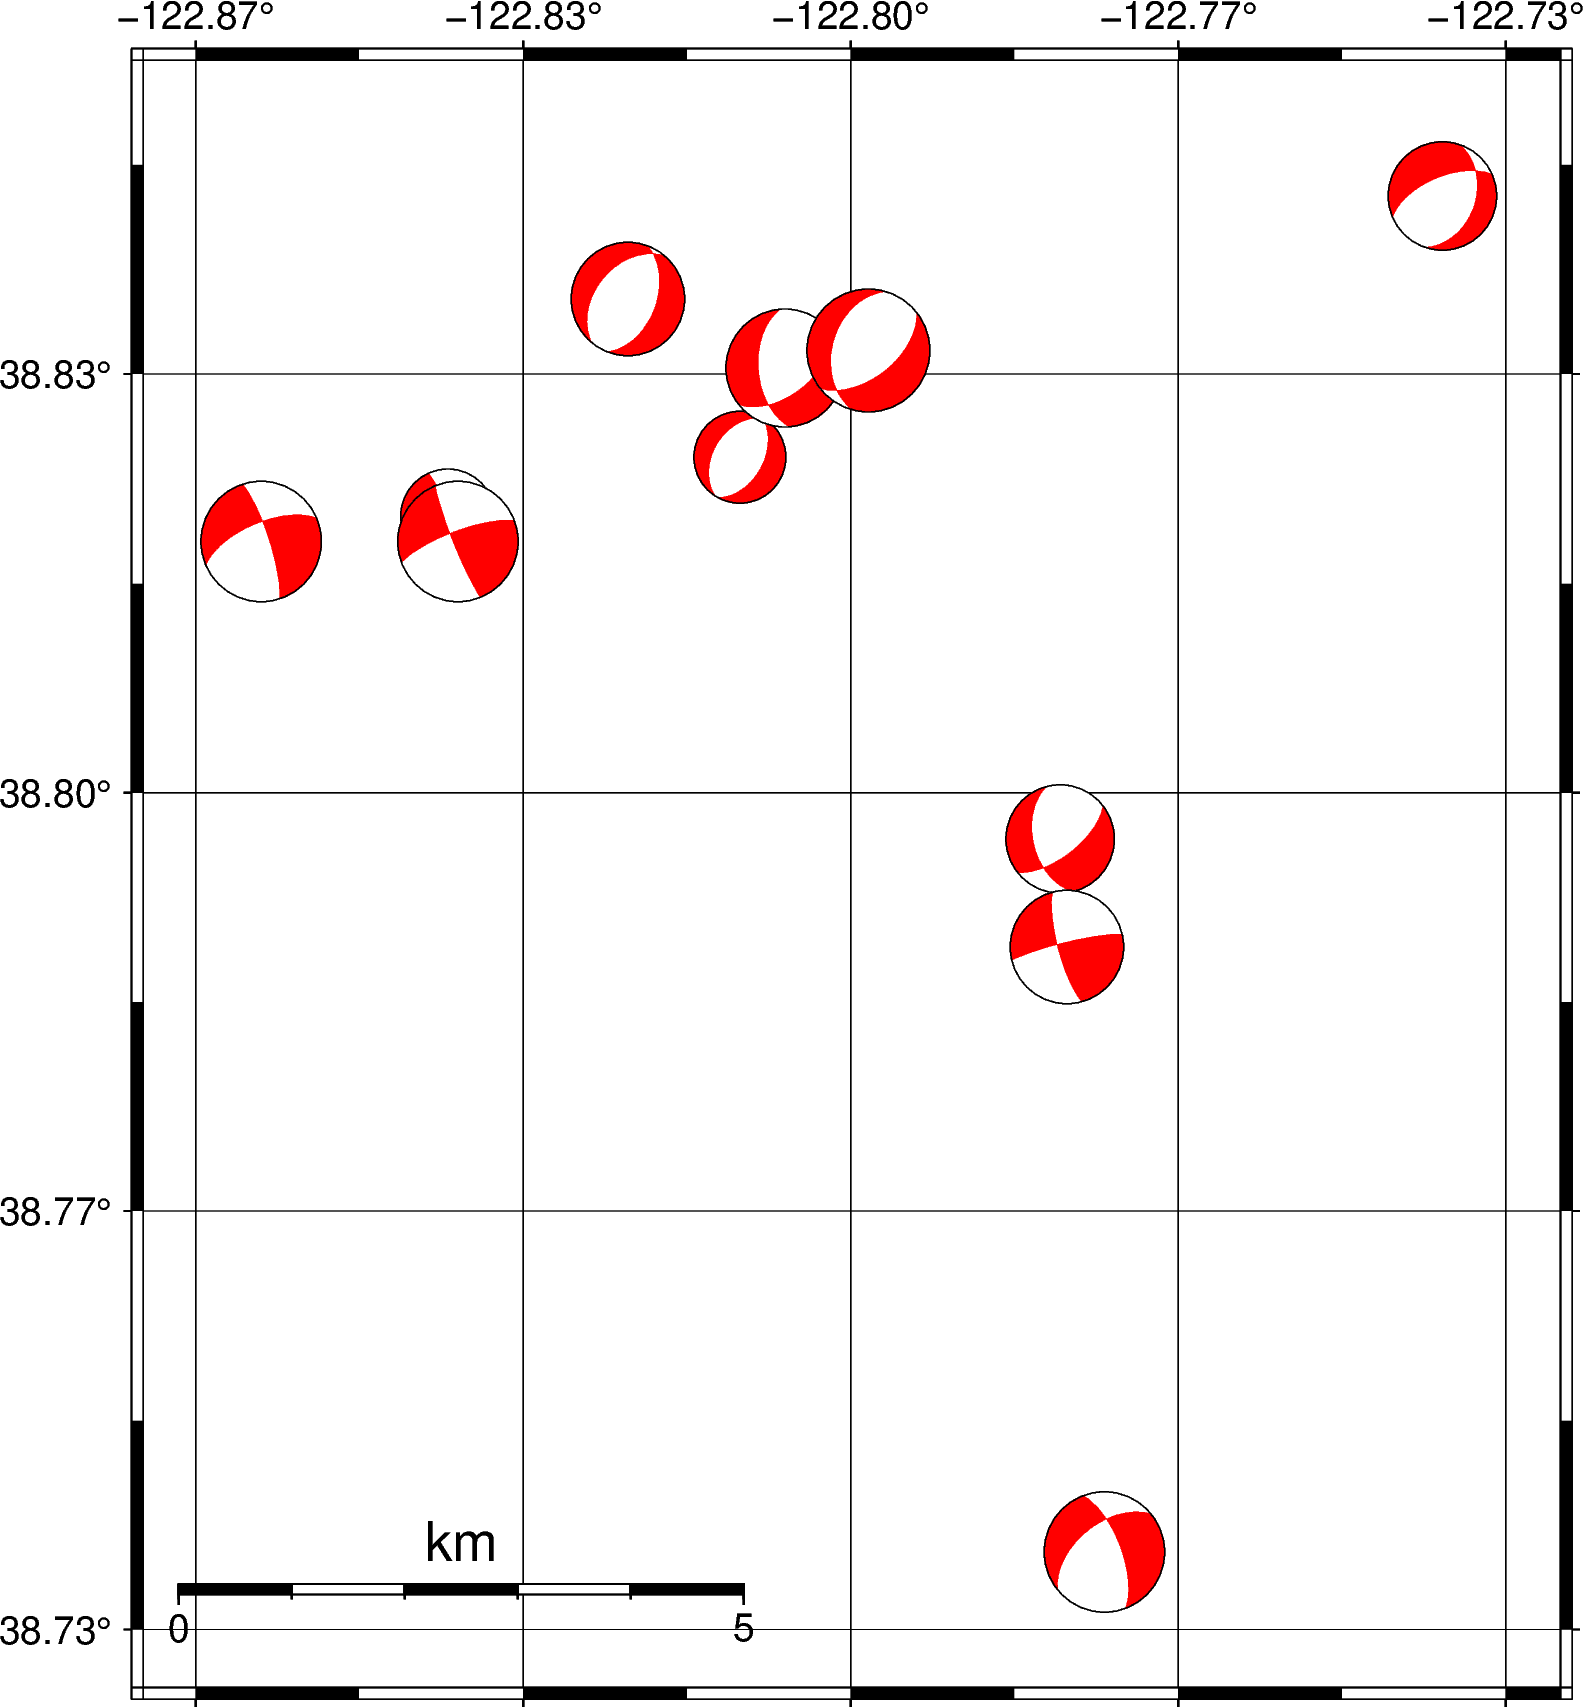

In [27]:
fig = fm.plot_map()
fig.basemap(map_scale=f"jBL+o0.3c/0.7c+w{5}k+f+lkm+at")
fig.show()

Or you can plot it in a high resolution map. 

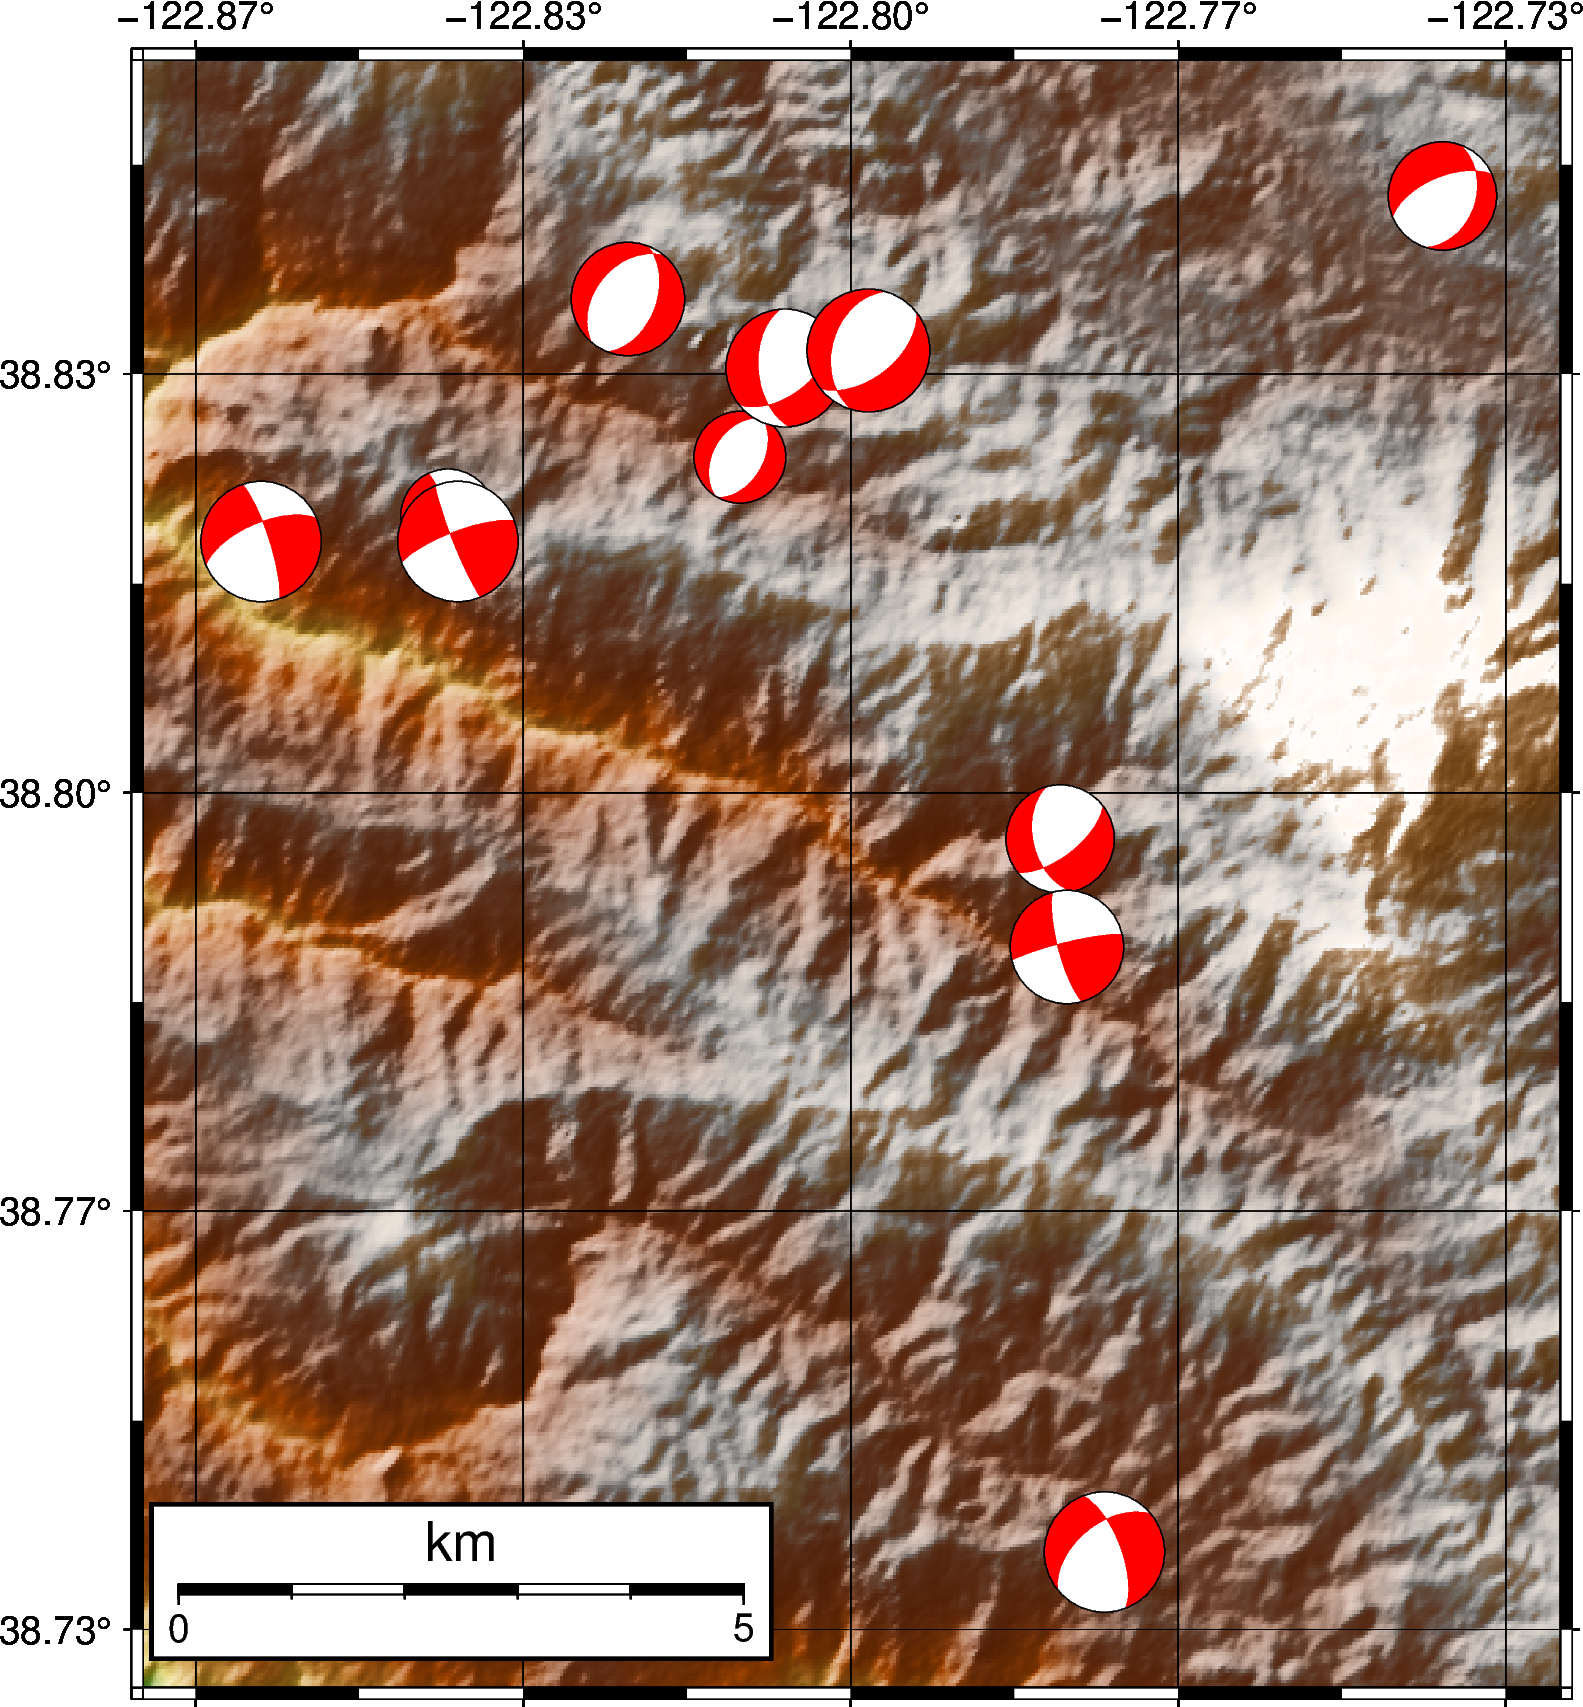

In [28]:
import pygmt

fm_region = fm.get_region(padding=0.1)

fig = pygmt.Figure() 
fig.basemap(region=fm_region,
            projection="M12c", 
            frame=["af","WNse"])
fig.grdimage(
            '@earth_relief_01s', #01m resolution 
            cmap=True,
            shading=True,
            frame=["afg","WNse"]
        )
fig.coast(
            shorelines=True,
            borders='1/1p,black',
            frame=["afg","WNse"],
        )
fig = fm.plot_map(fig)
fig.basemap(map_scale=f"jBL+o0.3c/0.7c+w{5}k+f+lkm+at",box='+gwhite+p1p')
fig.show()

# Position your FM

## Example No.1: Only one FM
Adding plot_latitude and plot_longitude columns, you could position your Focal Mechanism. We will show you with only one FM, but you can do with all you want

In [29]:
pos_df = df.iloc[0:1]
pos_df = pos_df.assign(plot_latitude=38.77) 
pos_df = pos_df.assign(plot_longitude=-122.77) 
pos_df

,latitude,longitude,depth,strike,dip,rake,magnitude,plot_latitude,plot_longitude
0,38.822,-122.841,5.0,244.0,75.0,-7.0,4.0,38.77,-122.77


In [30]:
basemeca = BaseMeca(scale="1.0c",color="red",cmap=False,
                transparency=None)
pos_fm = FM(data=pos_df,basemeca=basemeca)
print(pos_fm.__str__(True))

Catalog | 1 focal mechanisms 
	depth : [5.0, 5.0]
	magnitude : [4.0, 4.0]
	region: [-122.84, -122.77, 38.77, 38.82]


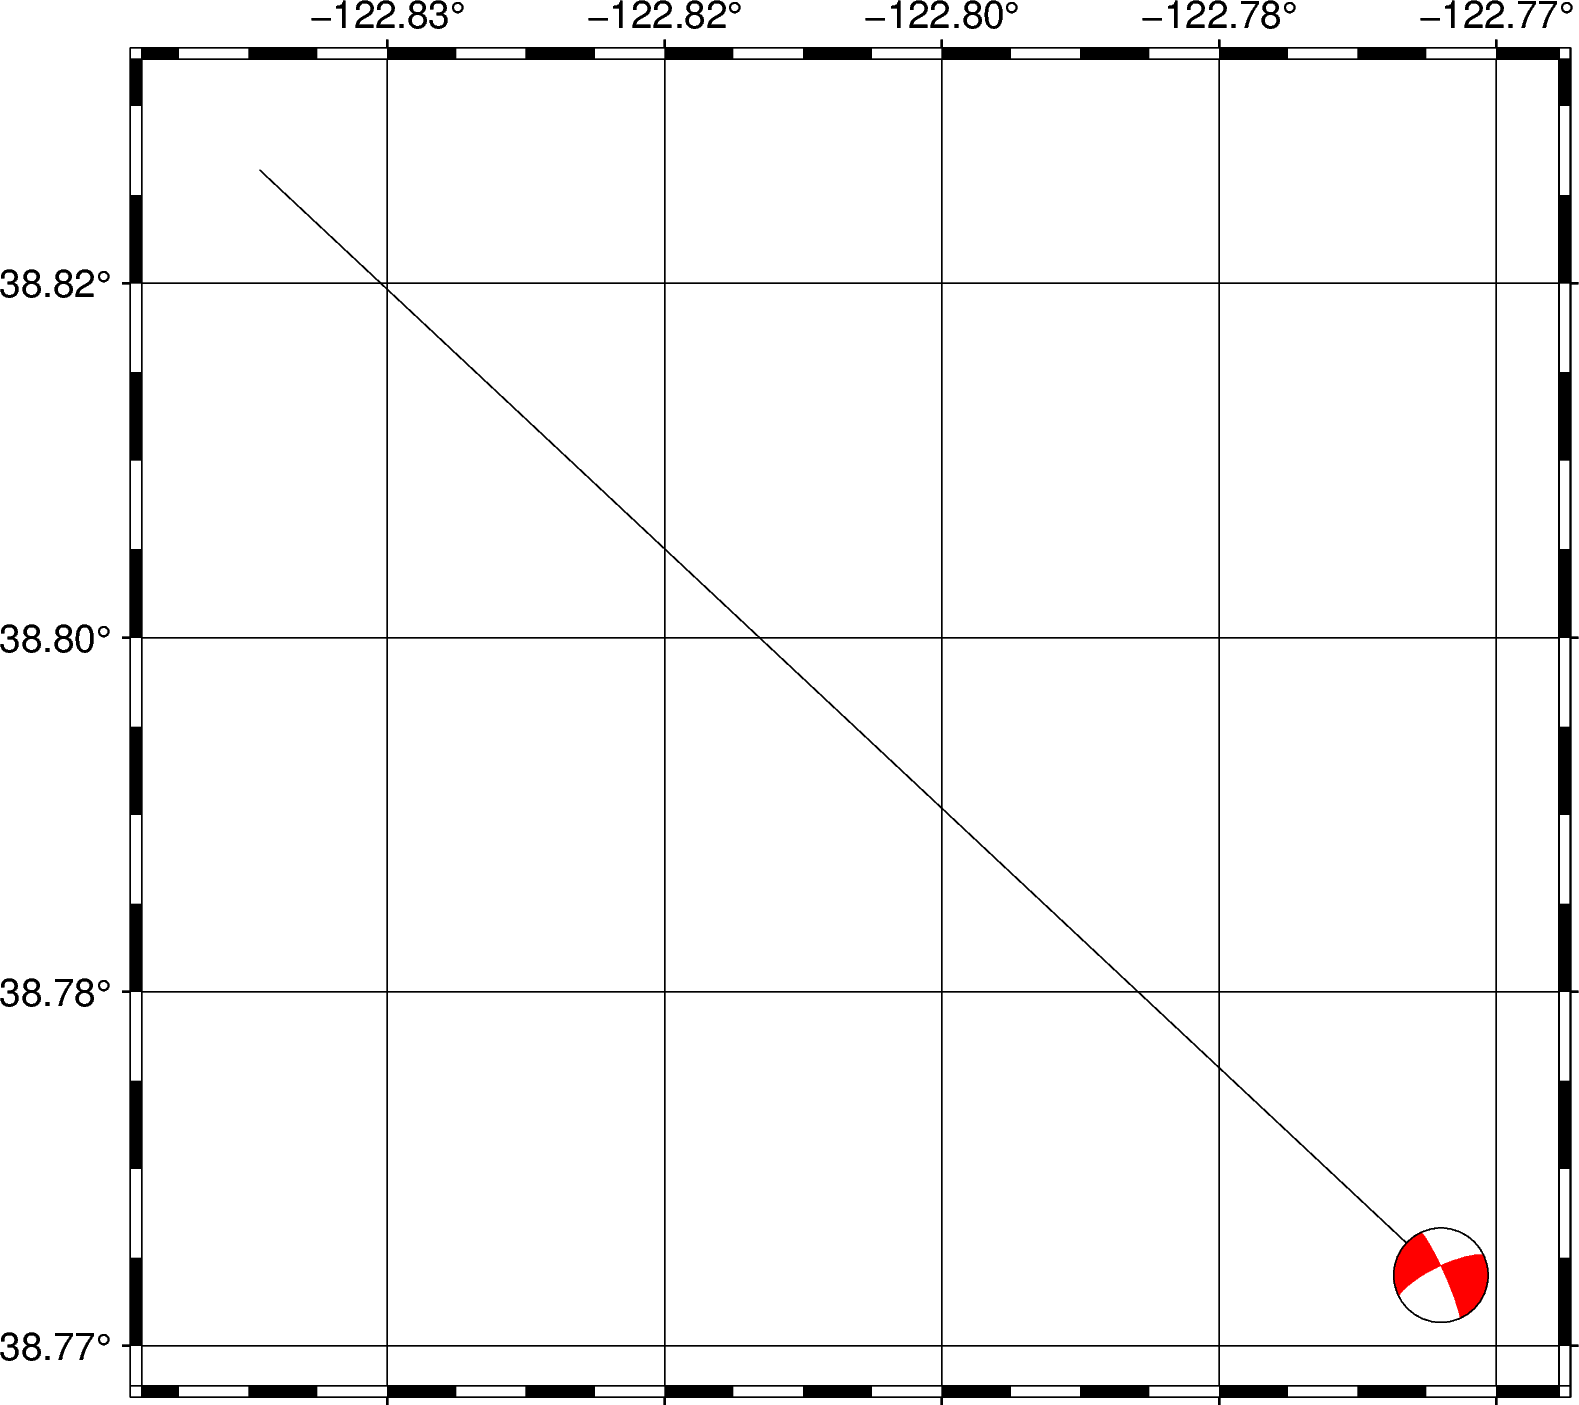

In [31]:
fig = pos_fm.plot_map()
fig.show()

## Example No.2 : Several FMs

Before to add the columns. As we don't know where we have to plot the FM, take a look in these steps to do it automatically.

- We will divide FM in two regions using filter_region function. 

In [32]:
fm1 = fm.copy()
filter_domain=[-122.87,-122.80,38.73,38.86]
pol2filter = [(filter_domain[0],filter_domain[2]),
                (filter_domain[0],filter_domain[3]),
                (filter_domain[1],filter_domain[3]),
                (filter_domain[1],filter_domain[2]),
                (filter_domain[0],filter_domain[2])
                ]
fm1.filter_region(polygon=pol2filter)
print(fm1.__str__(True))

fm2 = fm.copy()
filter_domain=[-122.80,-122.73,38.73,38.86]
pol2filter = [(filter_domain[0],filter_domain[2]),
                (filter_domain[0],filter_domain[3]),
                (filter_domain[1],filter_domain[3]),
                (filter_domain[1],filter_domain[2]),
                (filter_domain[0],filter_domain[2])
                ]
fm2.filter_region(polygon=pol2filter)
print(fm2.__str__(True))

Catalog | 6 focal mechanisms 
	depth : [3.5, 12.0]
	magnitude : [3.9, 5.1]
	region: [-122.86, -122.81, 38.82, 38.84]
Catalog | 5 focal mechanisms 
	depth : [1.5, 8.0]
	magnitude : [4.6, 5.2]
	region: [-122.8, -122.74, 38.74, 38.85]


We obtained two different catalogs filtered by a region. 
- We are going to conscruct the plot_latitude and plot_longitude columns in each region.
- After, we will extract the data and create a new dataframe for a new FM object

In [33]:
import numpy as np
y1 = np.linspace(38.73,38.84,6).tolist()
y2 = np.linspace(38.73,38.84,5).tolist()

df1 = fm1.data.sort_values(by="latitude",ignore_index=True,ascending=True)
df2 = fm2.data.sort_values(by="latitude",ignore_index=True,ascending=True)

df1["plot_latitude"] = y1
df2["plot_latitude"] = y2
df1 = df1.assign(plot_longitude=-122.85)
df2 = df2.assign(plot_longitude=-122.75)

pos_df = pd.concat([df1,df2])
pos_df


,latitude,longitude,depth,strike,dip,rake,magnitude,plot_latitude,plot_longitude
0,38.8200,-122.8600,12.0,247.00,65.00,-12.00,5.1,38.7300,-122.85
1,38.8200,-122.8400,11.5,158.00,84.00,166.00,5.1,38.7520,-122.85
2,38.8220,-122.8410,5.0,244.00,75.00,-7.00,4.0,38.7740,-122.85
3,38.8267,-122.8113,3.5,28.96,47.84,-91.79,3.9,38.7960,-122.85
4,38.8338,-122.8067,3.5,51.60,53.79,-48.68,5.0,38.8180,-122.85
5,38.8393,-122.8227,3.5,20.88,48.60,-102.51,4.8,38.8400,-122.85
0,38.7395,-122.7742,5.0,230.95,52.95,-29.00,5.1,38.7300,-122.75
1,38.7877,-122.7780,3.5,164.99,77.18,172.75,4.8,38.7575,-122.75
2,38.7963,-122.7787,1.5,52.07,65.00,-46.29,4.6,38.7850,-122.75
3,38.8352,-122.7982,8.0,51.70,55.17,-67.63,5.2,38.8125,-122.75


We have to create again our FM object, and you will se how does it plot.

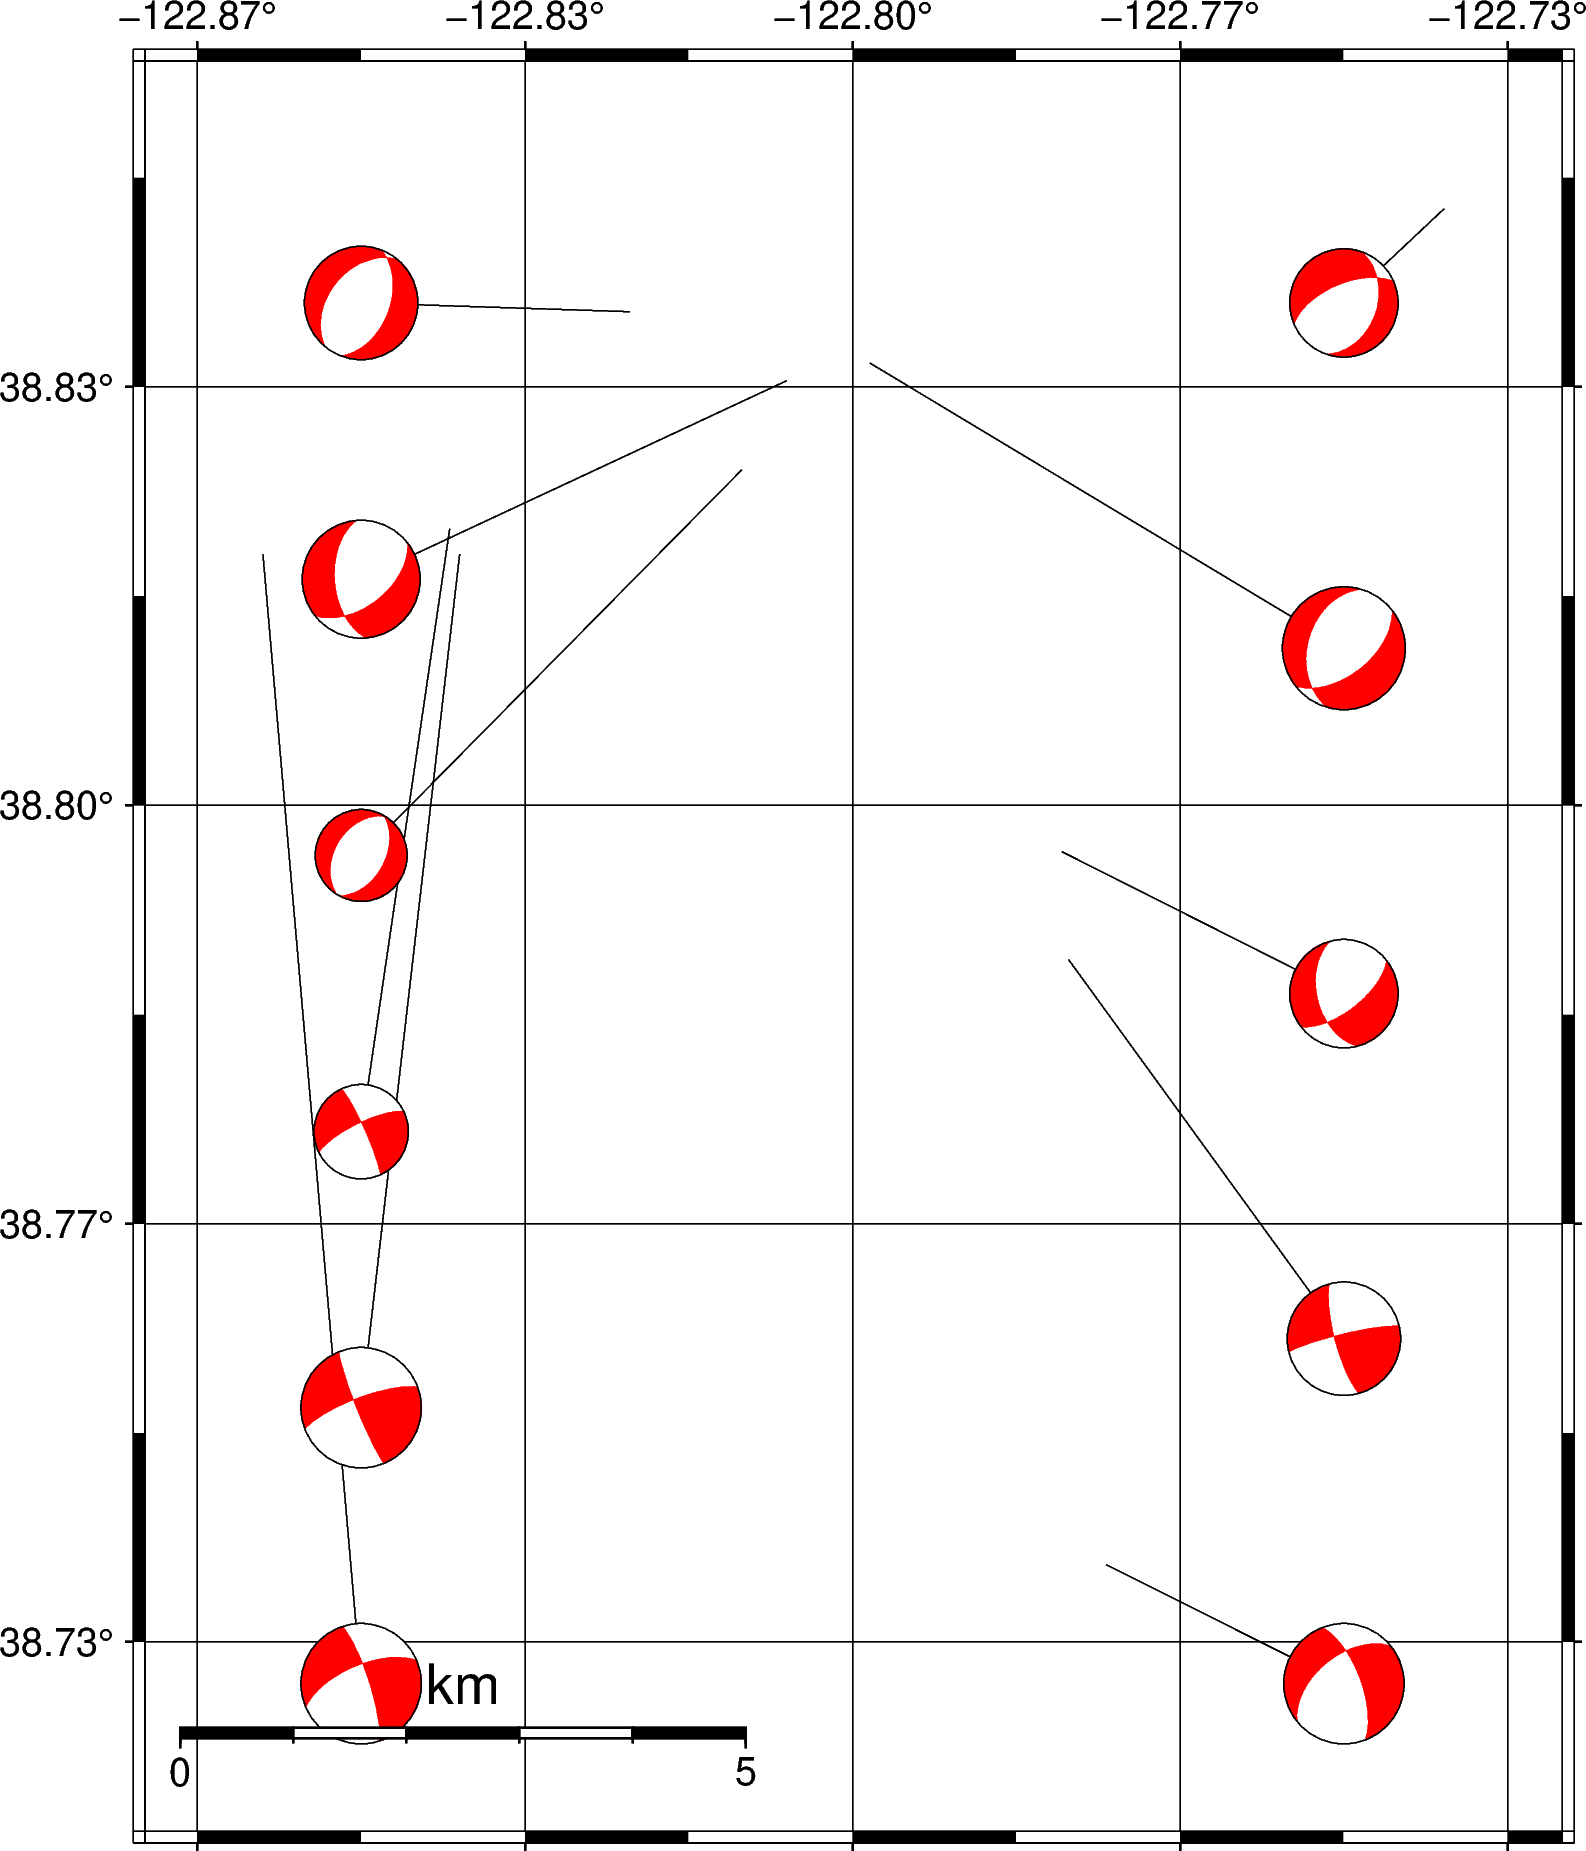

In [34]:
basemeca = BaseMeca(scale="1.0c",color="red",cmap=False,
                transparency=None)
pos_fm = FM(data=pos_df,basemeca=basemeca)
fig = pos_fm.plot_map()
fig.basemap(map_scale=f"jBL+o0.3c/0.7c+w{5}k+f+lkm+at")
fig.show()

In this example, we will also plot the depth of the FM event

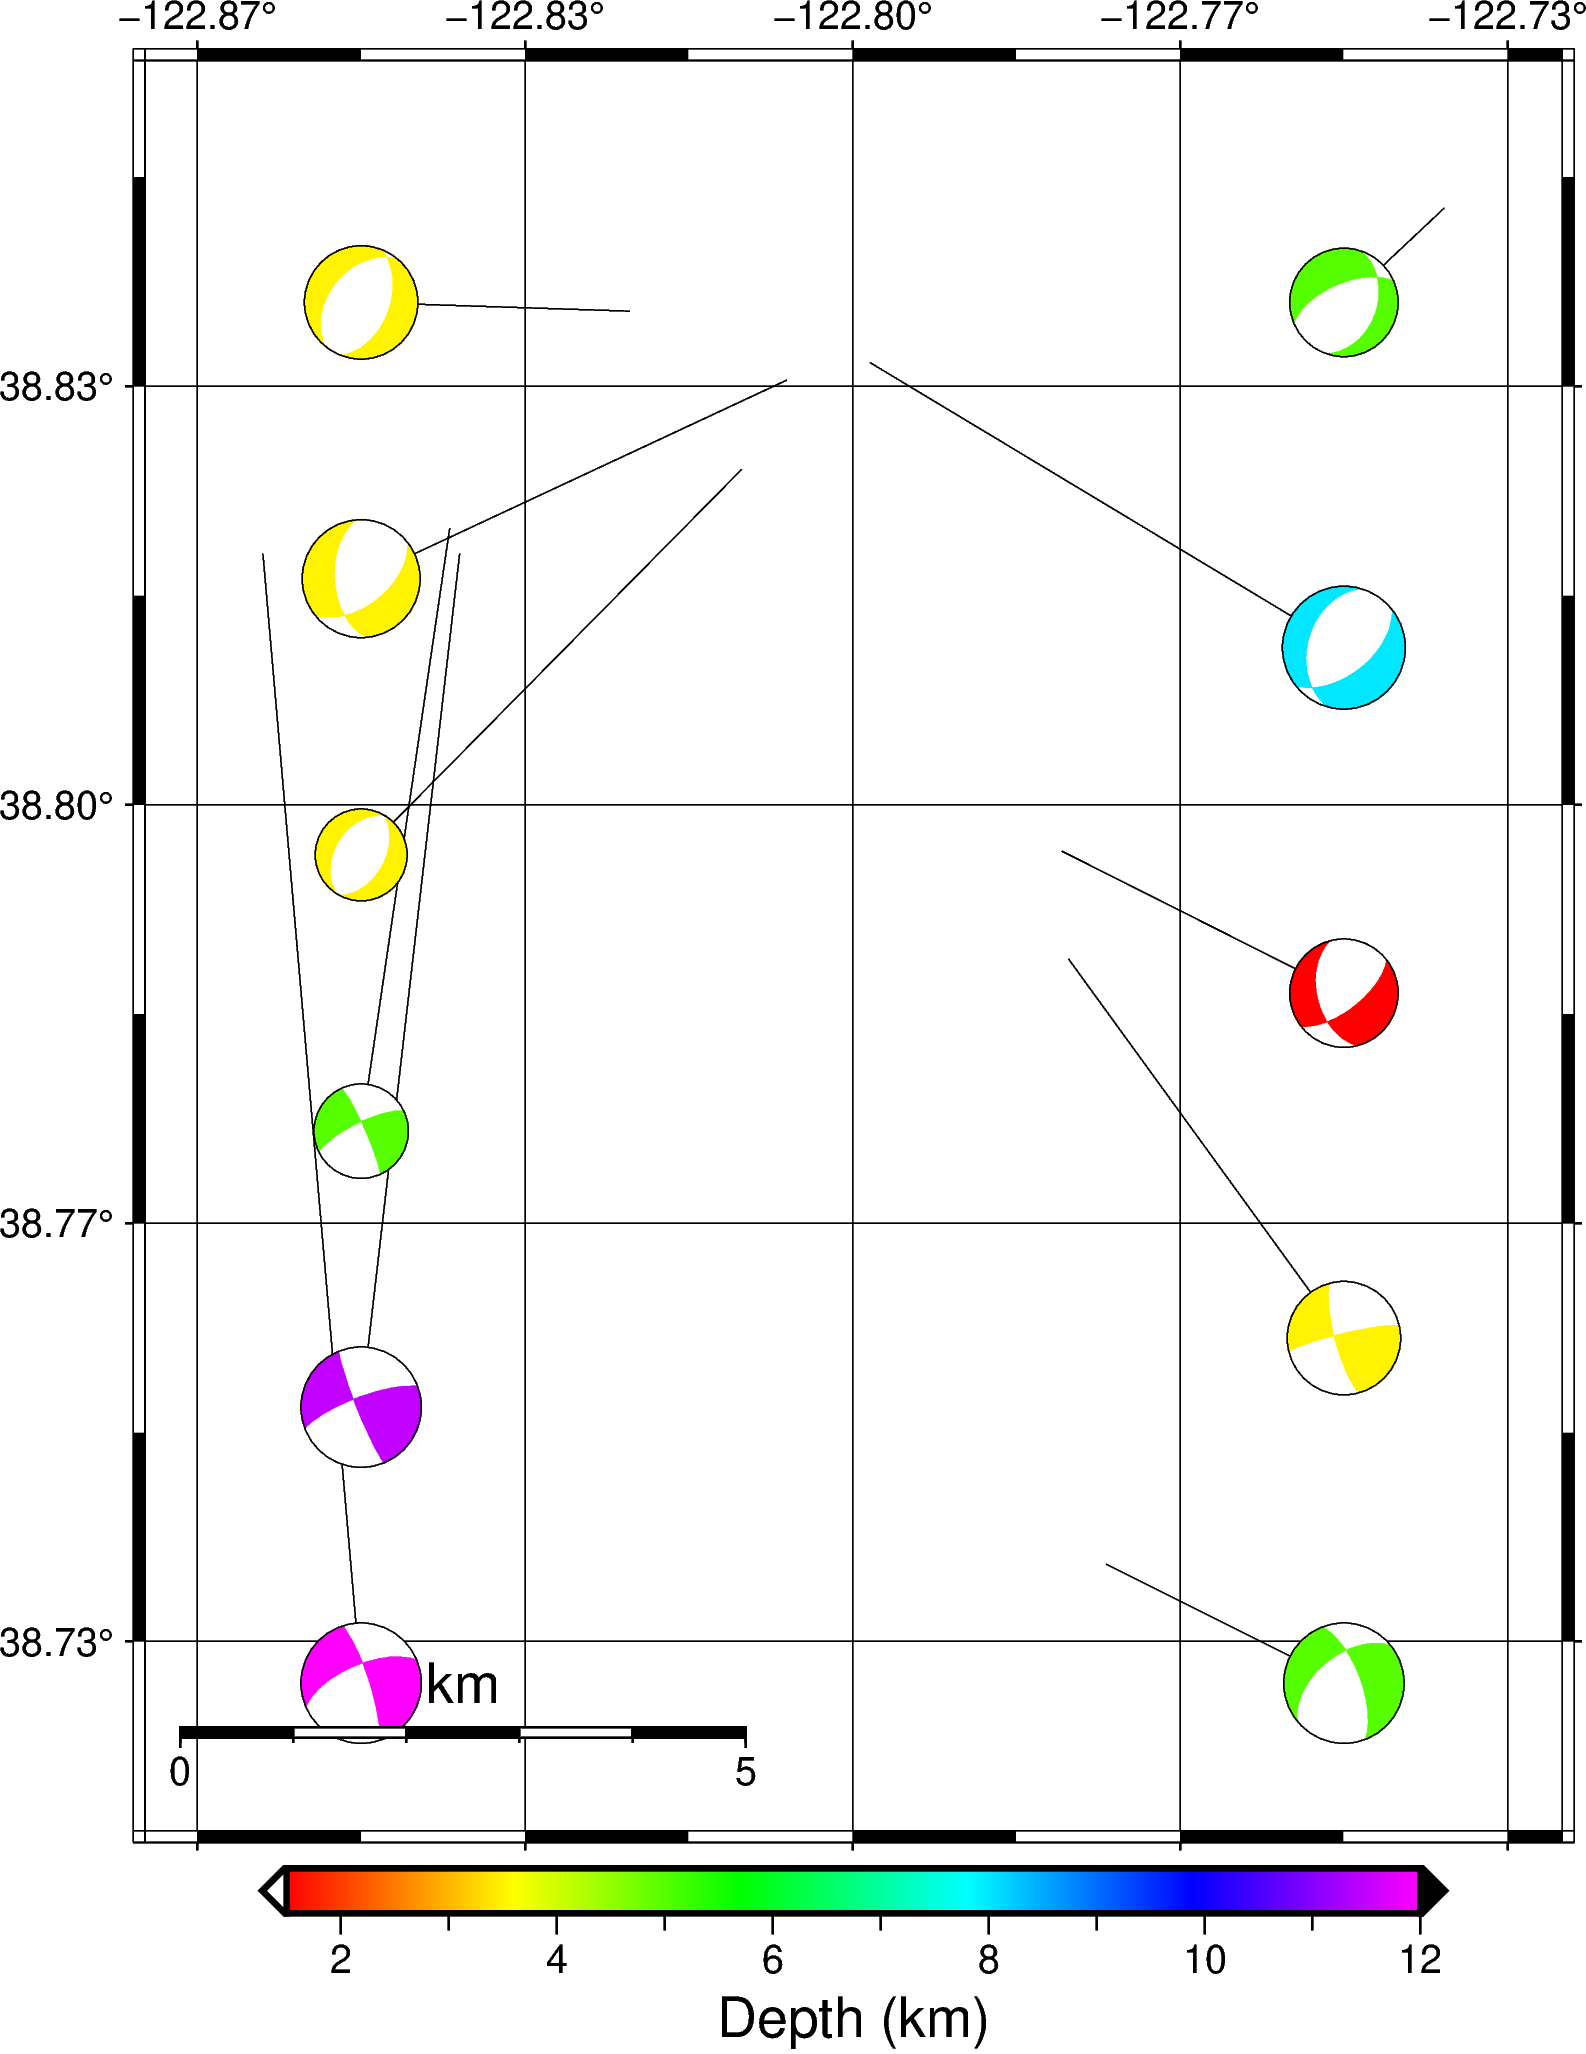

In [35]:
basemeca = BaseMeca(scale="1.0c",color="red",cmap=True,
                transparency=None)
fm_cpt = CPT(color_target="depth",
                label="Depth (km)",
                cmap="rainbow",
                series=[fm.data.depth.min(),
                        fm.data.depth.max()],
                reverse=True,
                overrule_bg=True)

pos_fm = FM(data=pos_df,basemeca=basemeca)
fig = pos_fm.plot_map(cpt=fm_cpt,show_cpt=True)
fig.basemap(map_scale=f"jBL+o0.3c/0.7c+w{5}k+f+lkm+at")
fig.show()

Or you can plot it with other map. 

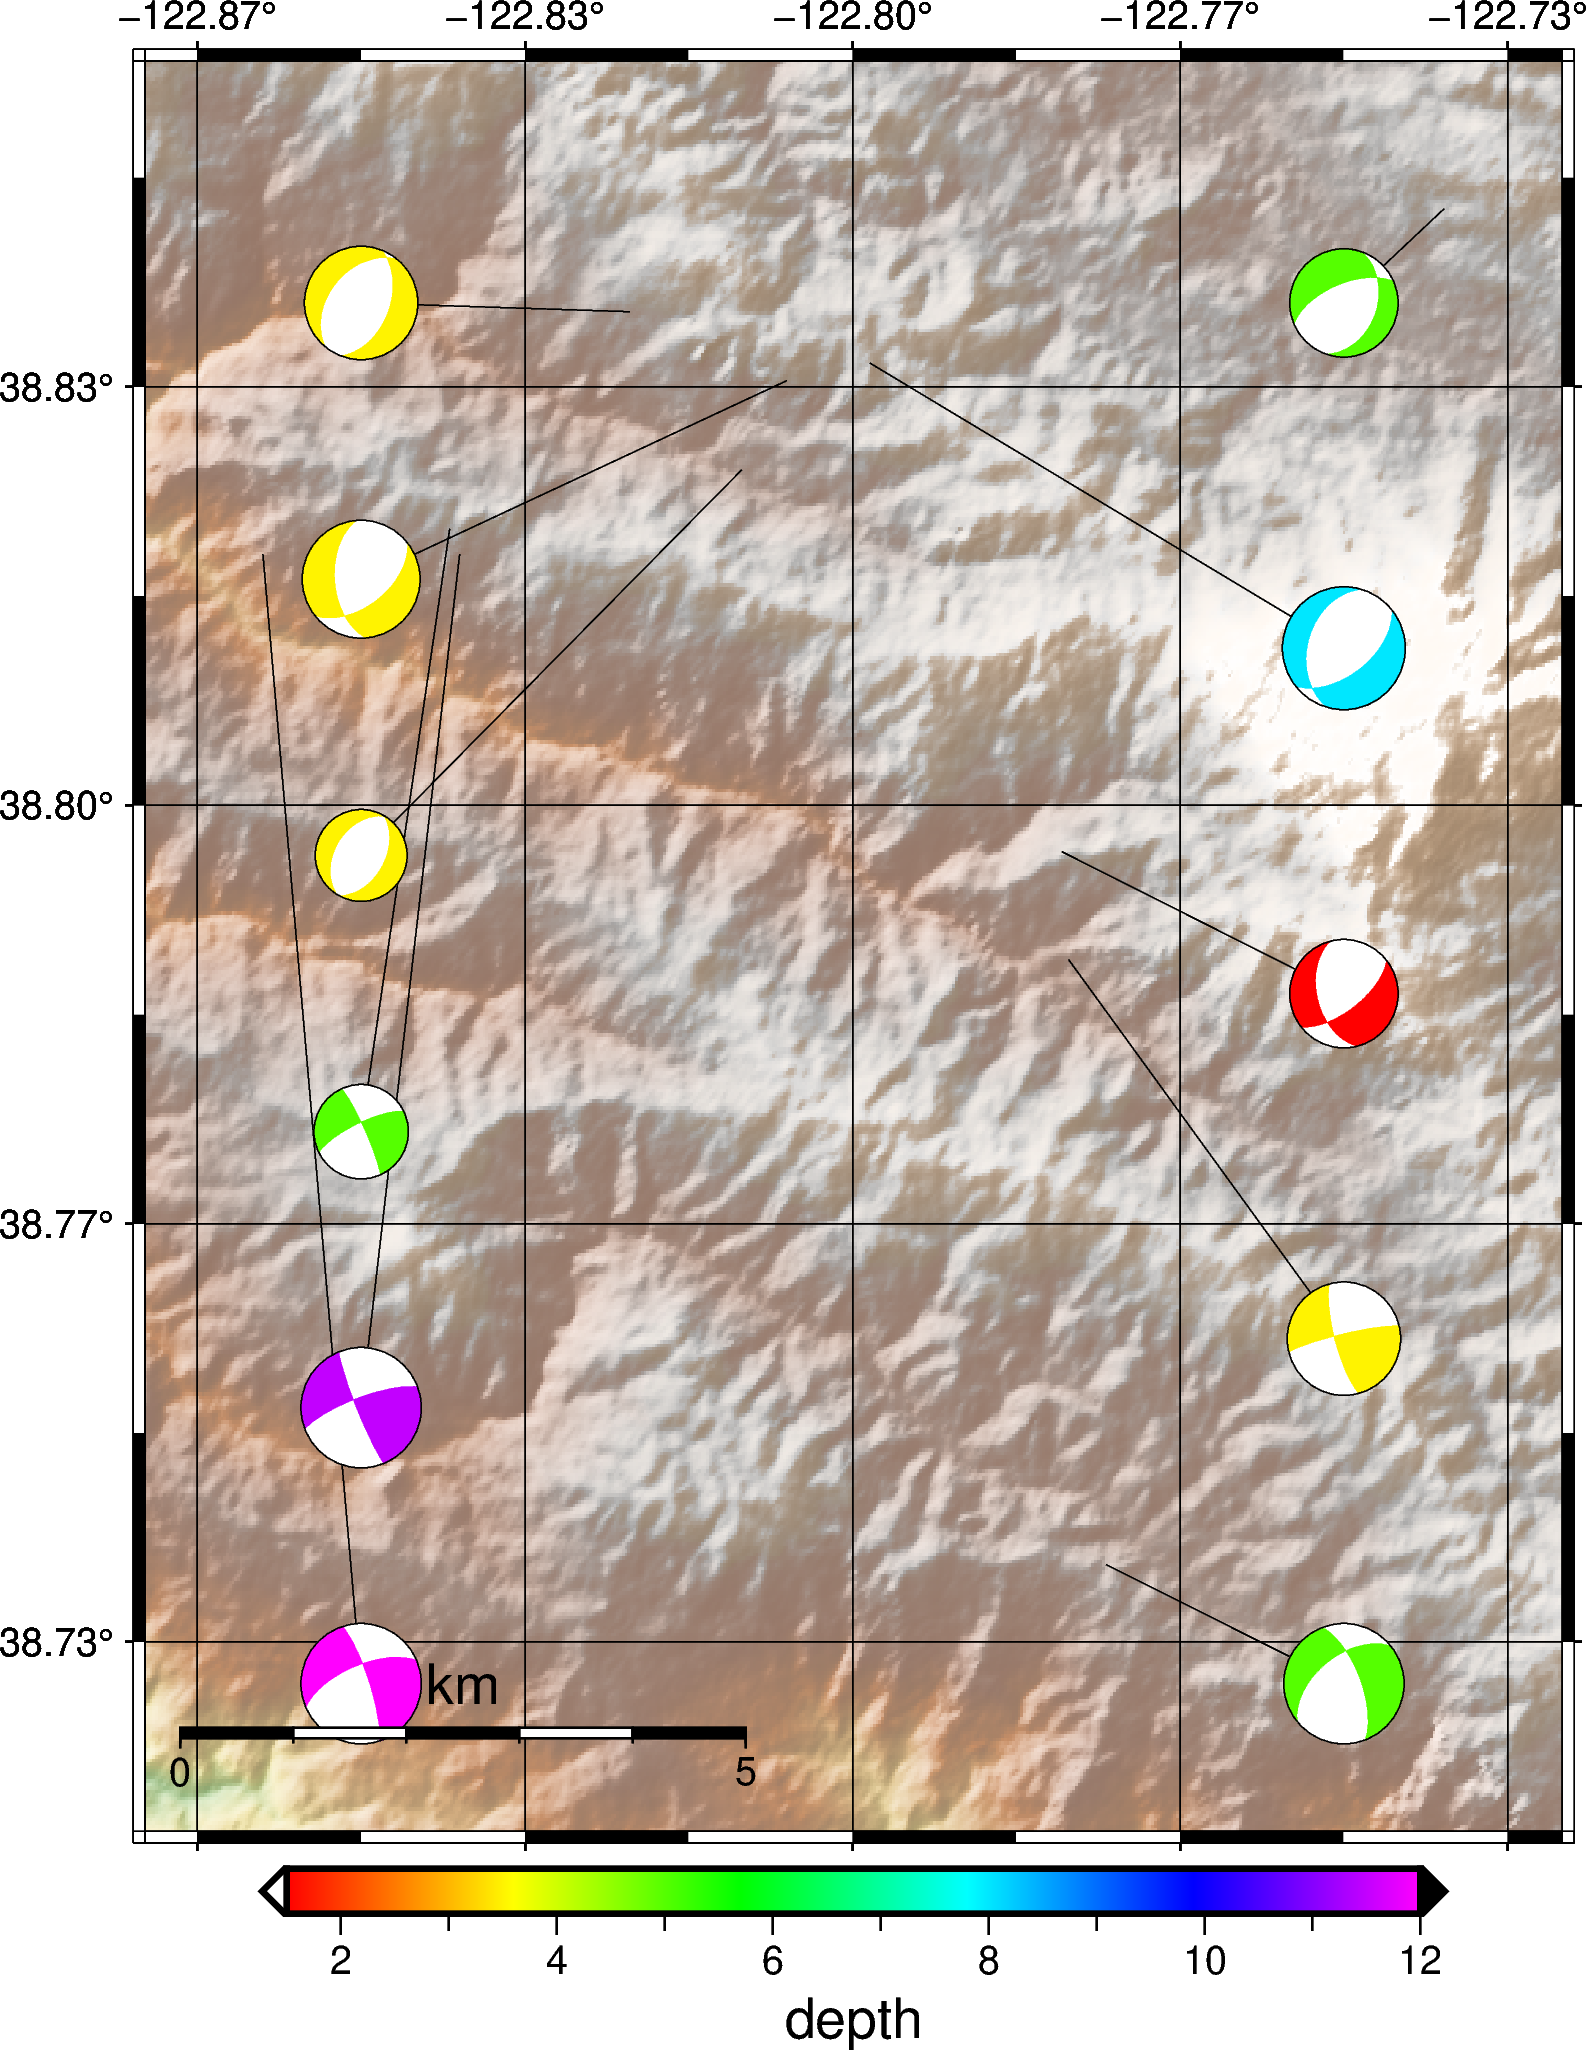

In [41]:
import pygmt

pos_fm_region = pos_fm.get_region(padding=0.1)

fig = pygmt.Figure() 
fig.basemap(region=pos_fm_region,
            projection="M12c", 
            frame=["af","WNse"])
fig.grdimage(
            '@earth_relief_01s', #01m resolution 
            cmap="geo",
            transparency=40,
            shading=True,
            frame=["afg","WNse"]
        )
fig.coast(
            shorelines=True,
            borders='1/1p,black',
            frame=["afg","WNse"],
        )
fig = pos_fm.plot_map(fig)
fig.basemap(map_scale=f"jBL+o0.3c/0.7c+w{5}k+f+lkm+at")
fig.show()

# MulFM

MulFM refers to multiple FM objects. It receives a list of FM objects and inheridate every method.

In [37]:
from EQViewer.eqviewer import MulFM

We will use some FMs defined before to instance MulFM

In [38]:
print(fm1)
print(fm2)

Catalog | 6 focal mechanisms 
Catalog | 5 focal mechanisms 


We can change the color in order to differentiate them.

In [39]:
fm1.basemeca.color = "green"
fm2.basemeca.color = "purple"
mulfm = MulFM([fm1,fm2])
print(mulfm)

fms (2 fms)
------------
1. Catalog | 6 focal mechanisms 
2. Catalog | 5 focal mechanisms 


Plot your mulfm object in a map.

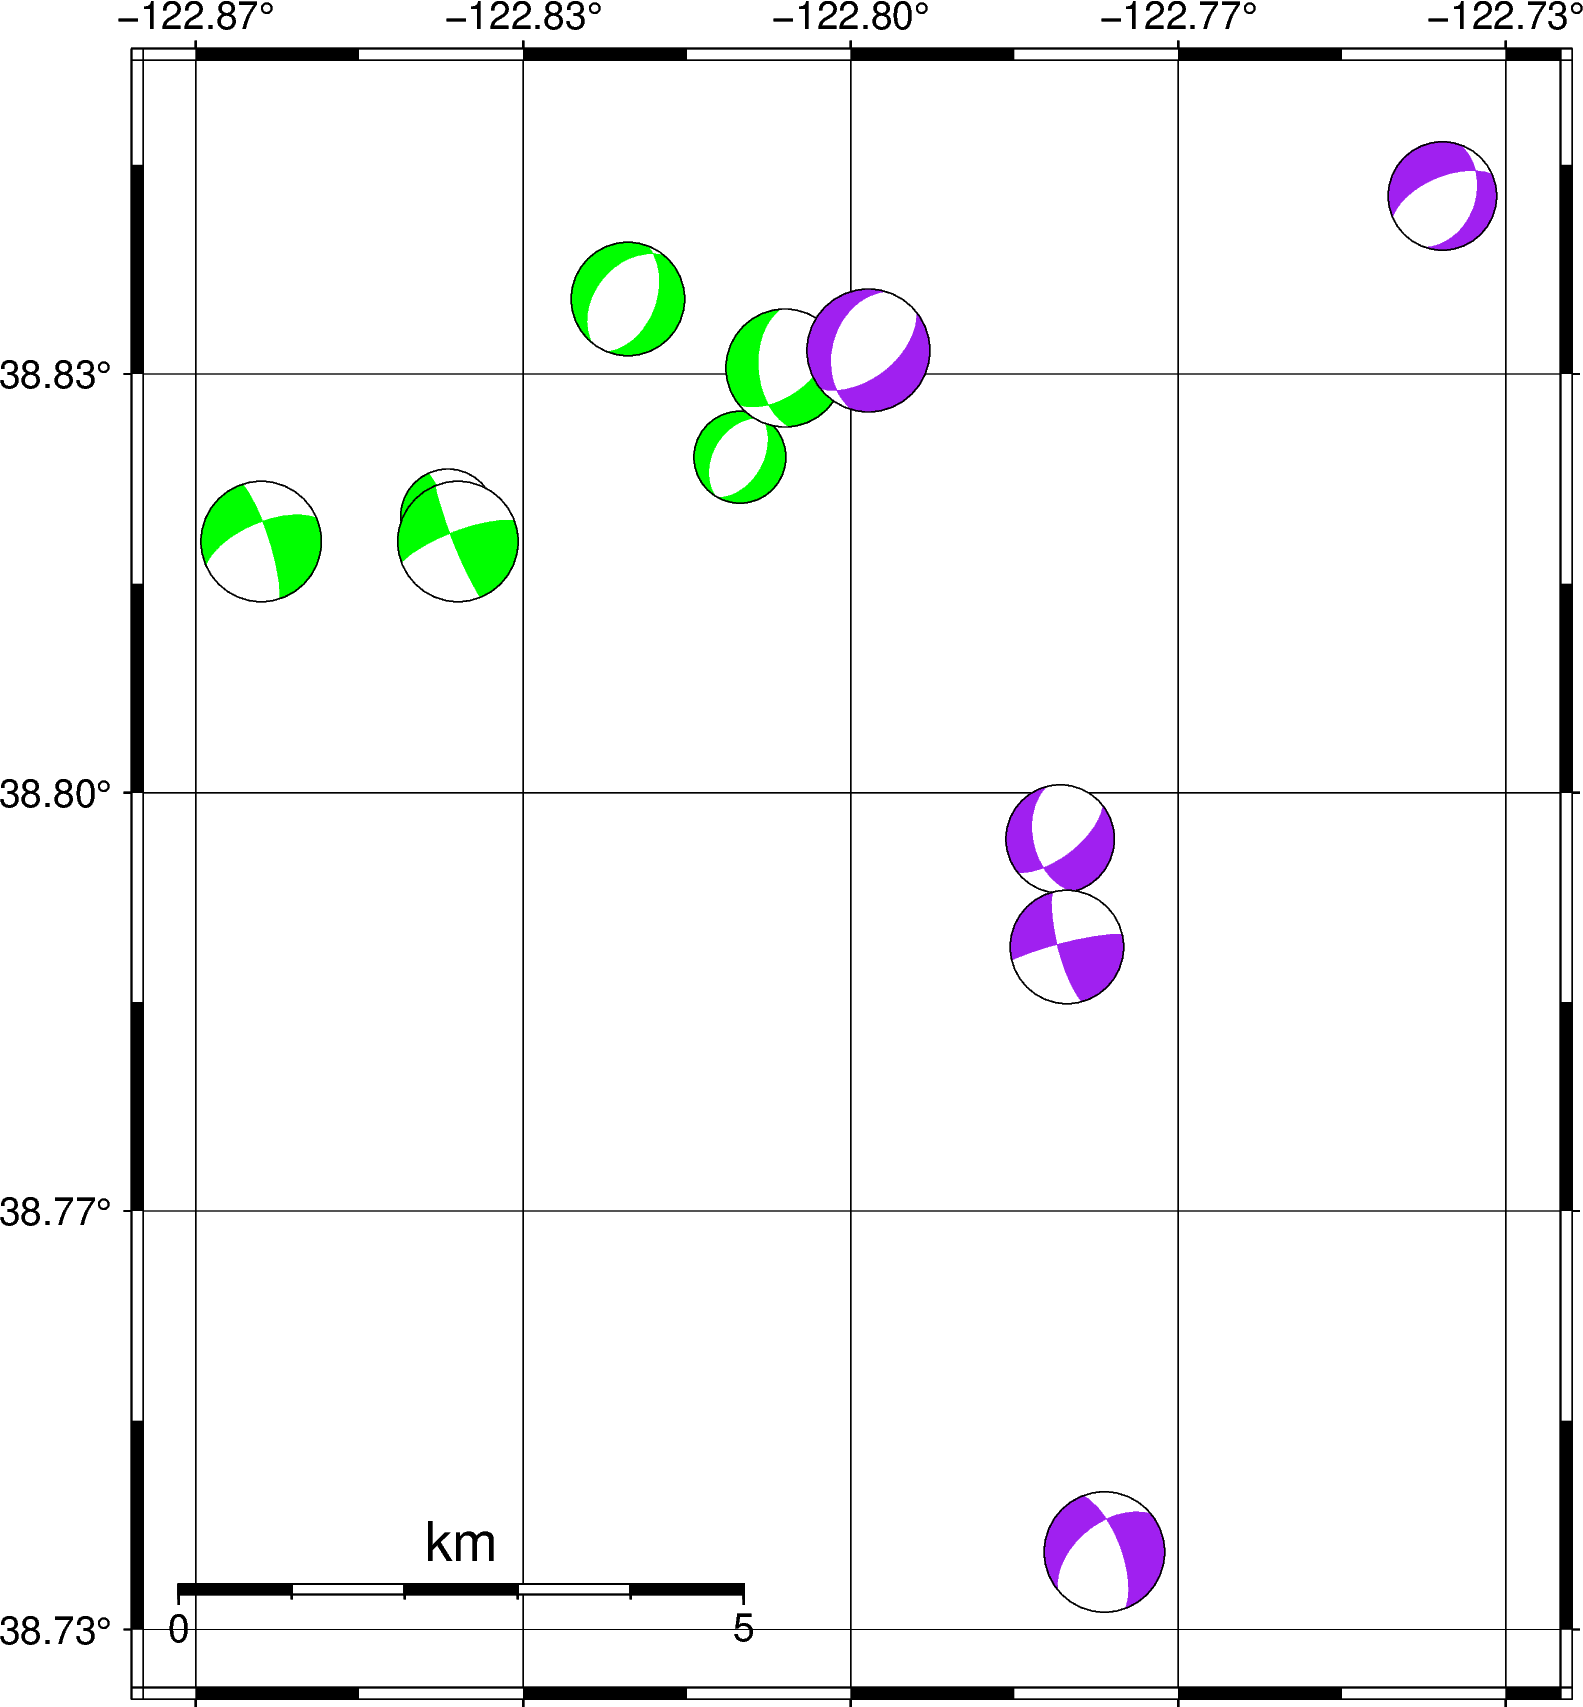

In [40]:
fig = mulfm.plot_map()
fig.basemap(map_scale=f"jBL+o0.3c/0.7c+w{5}k+f+lkm+at")
fig.show()